In [103]:
from matplotlib import pyplot as plt
import numpy as np
from skimage import color
from skimage import io

Set kernel size and standartderivation

In [104]:
kernelsize = 21
sigma = 5

if kernelsize%2==1:
    ks=kernelsize
ksn=int((ks-1)/2)

Get image Data

In [105]:
def gaus(x,y,s=1,n=0):
    return np.exp(-((x-n)**2/(2*s**2) + (y-n)**2/(2*s**2)))

def neighbours(a,b,mat,s=ksn):
    neighbors = [mat[i][j] for i in range(a-s, a+s+1) for j in range(b-s, b+s+1)]
    return np.array(neighbors)

#Get RGB_Channels from 4 Channel png
imgi = io.imread('a.png')[:,:,:3]

#convert to Grayscale
imgg = color.rgb2gray(imgi)

Create miror padding depending of the kernel size

In [106]:
def mirror_padding(img,ksn):
    m2 = np.flipud(img)
    m2o = m2[-ksn:,:]
    m2u = m2[:ksn,:]
    m1 = np.fliplr(m2)
    m1ol=m1[-ksn:,-ksn:]
    m1ul=m1[:ksn,-ksn:]
    m1ur=m1[:ksn,:ksn]
    m1or=m1[-ksn:,:ksn]
    m3 = np.fliplr(img)
    m3l= m3[:,-ksn:]
    m3r= m3[:,:ksn]

    imgn=np.zeros((len(img)+2*ksn,len(img[0])+2*ksn))
    imgn[0:ksn,0:ksn]=m1ol
    imgn[ksn:-ksn,0:ksn]=m3l
    imgn[-ksn:,:ksn]=m1ul
    imgn[-ksn:,ksn:-ksn]=m2u
    imgn[-ksn:,-ksn:]=m1ur
    imgn[ksn:-ksn,-ksn:]=m3r
    imgn[0:ksn,-ksn:]=m1or
    imgn[0:ksn,ksn:-ksn]=m2o
    imgn[ksn:-ksn,ksn:-ksn]=img
    return imgn

img = mirror_padding(imgg,ksn)

Create gaus-kernel dependent from preset size and standartderivation

In [107]:
#gaußmatrix
g = np.zeros(ks**2)
n = 0
c = 0
for i in range(-ksn,ksn+1):
    for j in range(-ksn,ksn+1):
        n+=gaus(j,i,sigma)
        g[c]=gaus(j,i,sigma)
        c+=1
g = np.array(g/n)

Create averaged image

In [108]:
newimg = np.zeros((len(imgg),len(imgg[0])))
for a in range(len(newimg)):
    for b in range(len(newimg[0])):
        newimg[a,b]=np.multiply(neighbours(a+ksn,b+ksn,img,ksn),g).sum()

Generate unsharp masked Image

In [109]:
def usmasking(img,newimg,k=1):
    usmask = img-newimg
    return img+k*usmask

#for Highboost: k= khb
khb=4.5

Plot results

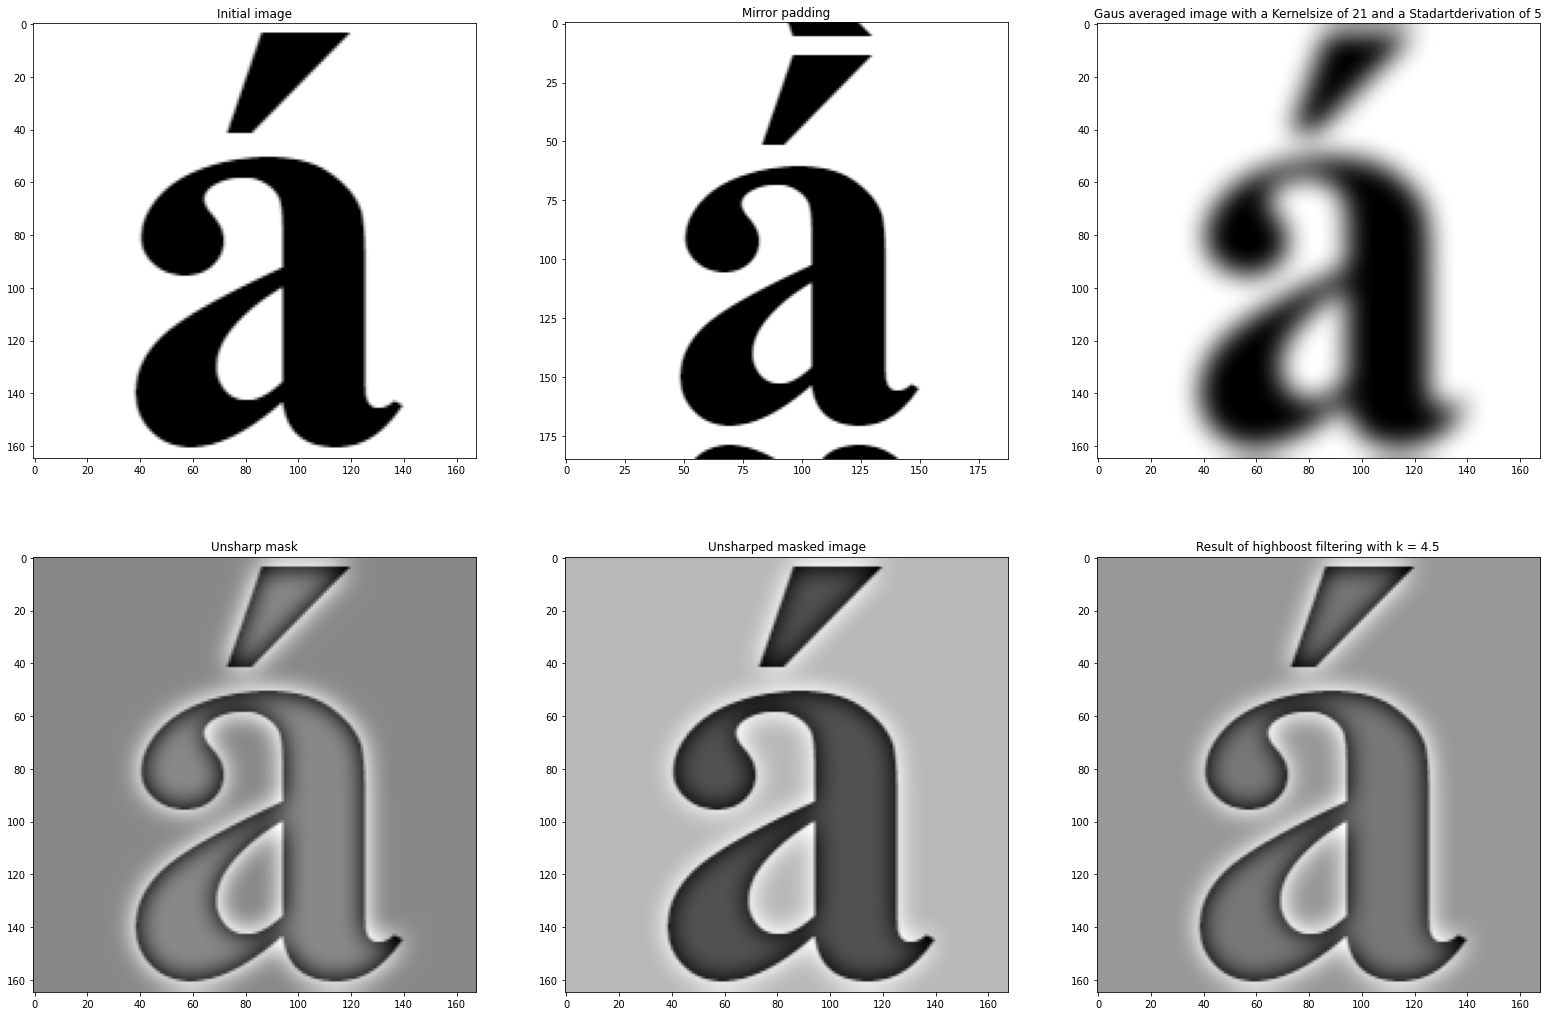

In [111]:
plt.figure(figsize = (27,18))
plt.axis('off')

plt.subplot(231)
plt.title('Initial image')
plt.imshow(imgg, cmap = "gray")

plt.subplot(232)
plt.title('Mirror padding')
plt.imshow(img, cmap = "gray")

plt.subplot(233)
plt.title('Gaus averaged image with a Kernelsize of '+str(ks)+' and a Stadartderivation of '+str(sigma))
plt.imshow(newimg, cmap = "gray")

plt.subplot(234)
plt.title("Unsharp mask")
plt.imshow(imgg-newimg, cmap = "gray")

plt.subplot(235)
plt.title('Unsharped masked image')
plt.imshow(usmasking(imgg,newimg,1), cmap = "gray")

plt.subplot(236)
plt.title('Result of highboost filtering with k = '+str(khb))
plt.imshow(usmasking(imgg,newimg,khb), cmap = "gray")
